In [1]:
# python 3.5

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from utility import movingAverage
%matplotlib inline

## gym initilize

In [3]:
env = gym.make('FrozenLake-v0')

[2017-01-02 18:48:51,670] Making new env: FrozenLake-v0


In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [15]:
learning_rate = 0.85
alpha = 0.99
num_episodes = 2000

In [16]:
reward_log = []

for epoch in range(num_episodes):
    s = env.reset()   # episode initilize
    rAll = 0
    
    action_in_episode = 0
    while action_in_episode < 99:
        action_in_episode += 1
        
        # choose action & add noise
        noise_q_action = np.random.randn(1,env.action_space.n)*(1./(epoch+1))
        a = np.argmax(Q[s,:] + noise_q_action) 
        
        # get new state
        s1, reward, done, _ = env.step(a)
        
        # udpate Q table
        Q[s,a] = Q[s,a] + learning_rate * (reward + alpha*np.max(Q[s1,:]) - Q[s,a])
        rAll += reward
        s = s1
        
        # check done
        if done == True:
            break
    reward_log.append(rAll)

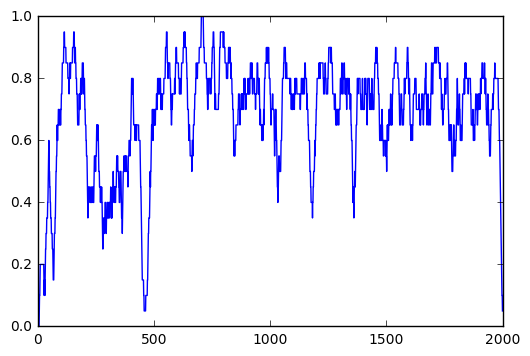

In [21]:
reward_log_mean = movingAverage(reward_log, 20)
plt.plot(reward_log_mean)

In [22]:
reward_log = []

for epoch in range(num_episodes):
    s = env.reset()   # episode initilize
    rAll = 0
    
    action_in_episode = 0
    while action_in_episode < 99:
        action_in_episode += 1
        
        # choose action & add noise
        a = np.argmax(Q[s,:]) 
        
        # get new state
        s1, reward, done, _ = env.step(a)
        
        # udpate Q table
        rAll += reward
        s = s1
        
        # check done
        if done == True:
            break
    reward_log.append(rAll)

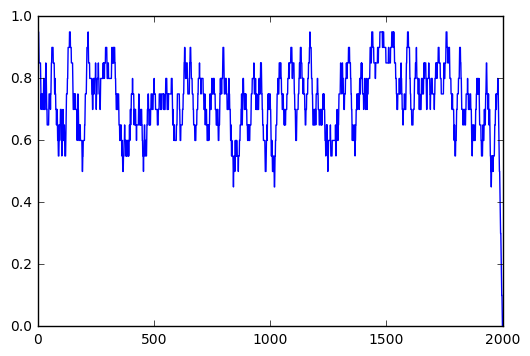

In [23]:
reward_log_mean = movingAverage(reward_log, 20)
plt.plot(reward_log_mean)